<img src="http://www.digitalvidya.com/wp-content/uploads/2013/05/logoa5-300x95.png">

## Data Analysis using Python Mini-Project
### Digital Vidya Copyright

### Data Cleaning and Exploratory Analysis 

In machine learning, you clean up the data and turn raw data into features from which you can derive the pattern. There are methods available to extract features that will be covered in upcoming sessions but it's very important to build the intuition. The process of data cleaning and visualization helps with that. In this assignment, we will try to manually identify the important features in the given dataset. 

### Dataset: Lending Club data

https://www.lendingclub.com/info/download-data.action

Years of data to download: 2007-2011

Load the Lending Club data into a pandas dataframe. The data contains 42538 rows and 145 columns. Not all these columns contain meaningful (or any) information so they need to be cleaned. The loans are categorized into different grades and sub-grades. It would be interesting to see whether they have any impact on the interest rates or not.
The process should lead us into default prediction, and finding the columns that directly predict how the loan will behave. These would be our most important features.

We strongly recommend that you look in to the columns closely to see the relationship between them. This is not a guided assignment and you can use the techniques that you have learnt so far to clean and visualize the data. 

There is no one right answer but this tests your ability to handle a much larger unknown dataset.

Here are the broad guidelines:

    View the data 
    Find the columns that are useful (may be null columns) and the ones that are not 
    Delete the columns that are not needed
    Clean columns values like int_rate and term by removing the string part and convert the column to numeric.
    Identify the columns containing useful information, they would be the features. 
    Visualize the important features


In [1]:
## Loading the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

loan = pd.read_csv('LoanStats3a.csv') 
loan.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(42538, 144)

In [2]:
## Deleting the null columns and rows

loan.dropna(axis=1, how='all', inplace=True)
loan.dropna(how='all', inplace=True)

## Cleaning and converting columns

loan['term'] = loan.term.str.extract('(\d+)')
loan['int_rate'] = loan.int_rate.str.extract('(\d+.\d+)')
loan[['term','int_rate']] = loan[['term','int_rate']].apply(pd.to_numeric)
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y')
pd.set_option('display.max_columns', 100)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,5000.0,5000.0,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,NaN,May-19,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2500.0,2500.0,2500.0,60.0,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2400.0,2400.0,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,NaN,Jun-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,10000.0,10000.0,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3000.0,3000.0,3000.0,60.0,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Fully Paid,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783.0,53.90%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,NaN,Apr-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN


## Analysing the data

In [3]:
print(loan.info())
loan.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42536 entries, 0 to 42537
Data columns (total 63 columns):
id                            1 non-null object
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null float64
int_rate                      42535 non-null float64
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null datetime64[ns]
loan_status                   42535 non-null object
pymnt_plan                    42535 non-null obj

(42536, 63)

In [4]:
pd.set_option('display.max_columns', 100)
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,settlement_amount,settlement_percentage,settlement_term
count,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.0,42535.0,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,42535.0,42506.000000,42390.0,42506.000000,41170.000000,42430.000000,160.000000,160.000000,160.000000
mean,11089.722581,10821.585753,10139.938785,42.207218,12.165016,322.623063,6.913656e+04,13.373043,0.152449,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,22.124406,0.0,0.0,12020.414206,11312.953251,9675.675936,2239.981444,1.516890,103.240029,14.428264,2613.245652,0.0,1.0,0.000094,0.0,0.143039,0.045227,0.000024,4270.794250,49.889875,1.262500
std,7410.938391,7146.914675,7131.598014,10.509342,3.707936,208.927216,6.409635e+04,6.726315,0.512406,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,11.592811,0.0,0.0,9094.890303,9038.639113,7105.750304,2585.057393,7.830064,737.171320,162.374268,4385.066535,0.0,0.0,0.009700,0.0,29.359579,0.208737,0.004855,3119.543917,15.569143,4.142869
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,193.290000,10.690000,0.000000
25%,5200.000000,5000.000000,4950.000000,36.000000,9.630000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,17.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,0.0,0.0,5465.685189,4793.115000,4400.000000,657.100000,0.000000,0.000000,0.000000,211.050000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,1842.750000,40.000000,0.000000
50%,9700.000000,9600.000000,8500.000000,36.000000,11.990000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,33.000000,85.000000,9.000000,0.000000,8.821000e+03,20.000000,0.0,0.0,9682.251696,8956.080000,8000.000000,1339.160000,0.000000,0.000000,0.000000,528.360000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,3499.350000,49.970000,0.000000
75%,15000.000000,15000.000000,14000.000000,60.000000,14.720000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,51.000000,101.000000,12.000000,0.000000,1.725100e+04,29.000000,0.0,0.0,16427.850065,15544.335000,13499.995000,2803.090000,0.000000,0.000000,0.000000,3170.220000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,5701.100000,60.652500,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,120.000000,129.000000,47.000000,5.000000,1.207359e+06,90.000000,0.0,0.0,58886.473430,58563.680000,35000.020000,23886.470000,209.000000,29623.350000,7002.190000,36115.200000,0.0,1.0,1.000000,0.0,6053.000000,2.000000,1.000000,14798.200000,92.740000,24.000000


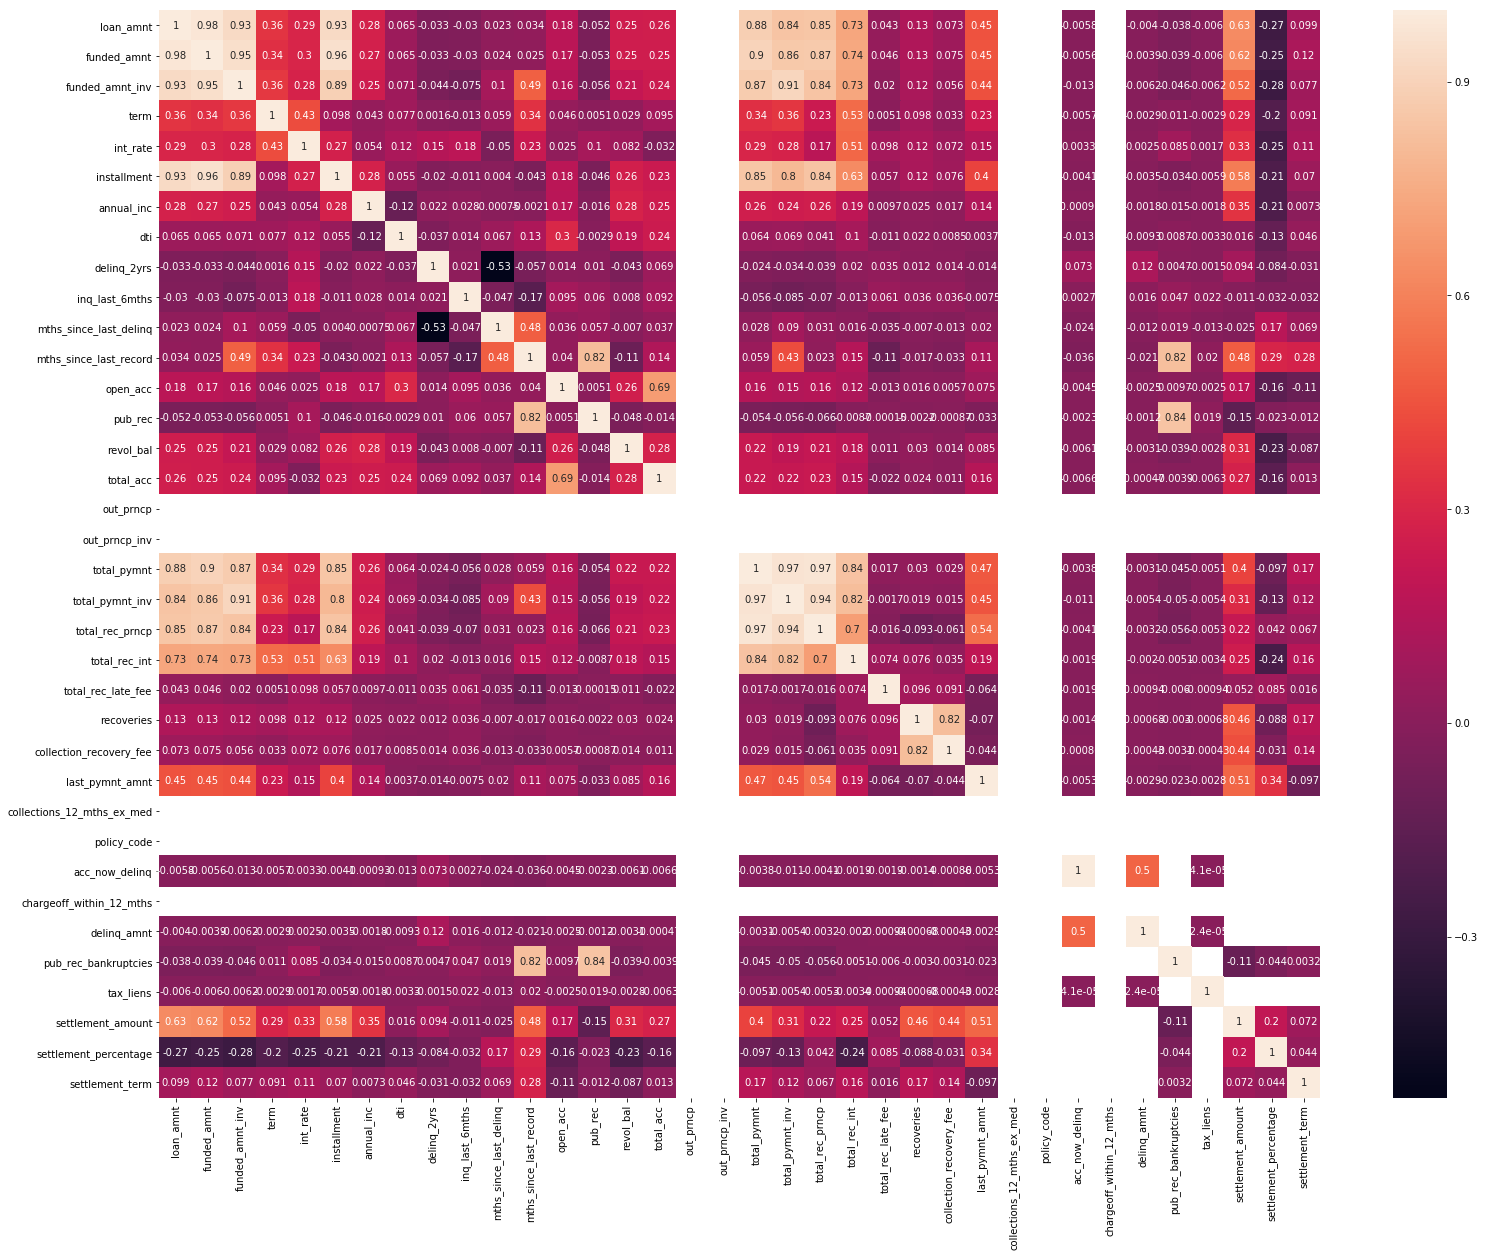

In [5]:
## Using a heatmap to find the correlations between columns

plt.figure(figsize=(26,20))
sns.heatmap(loan.corr(), annot=True)#cmap=sns.diverging_palette(20, 220, n=200))

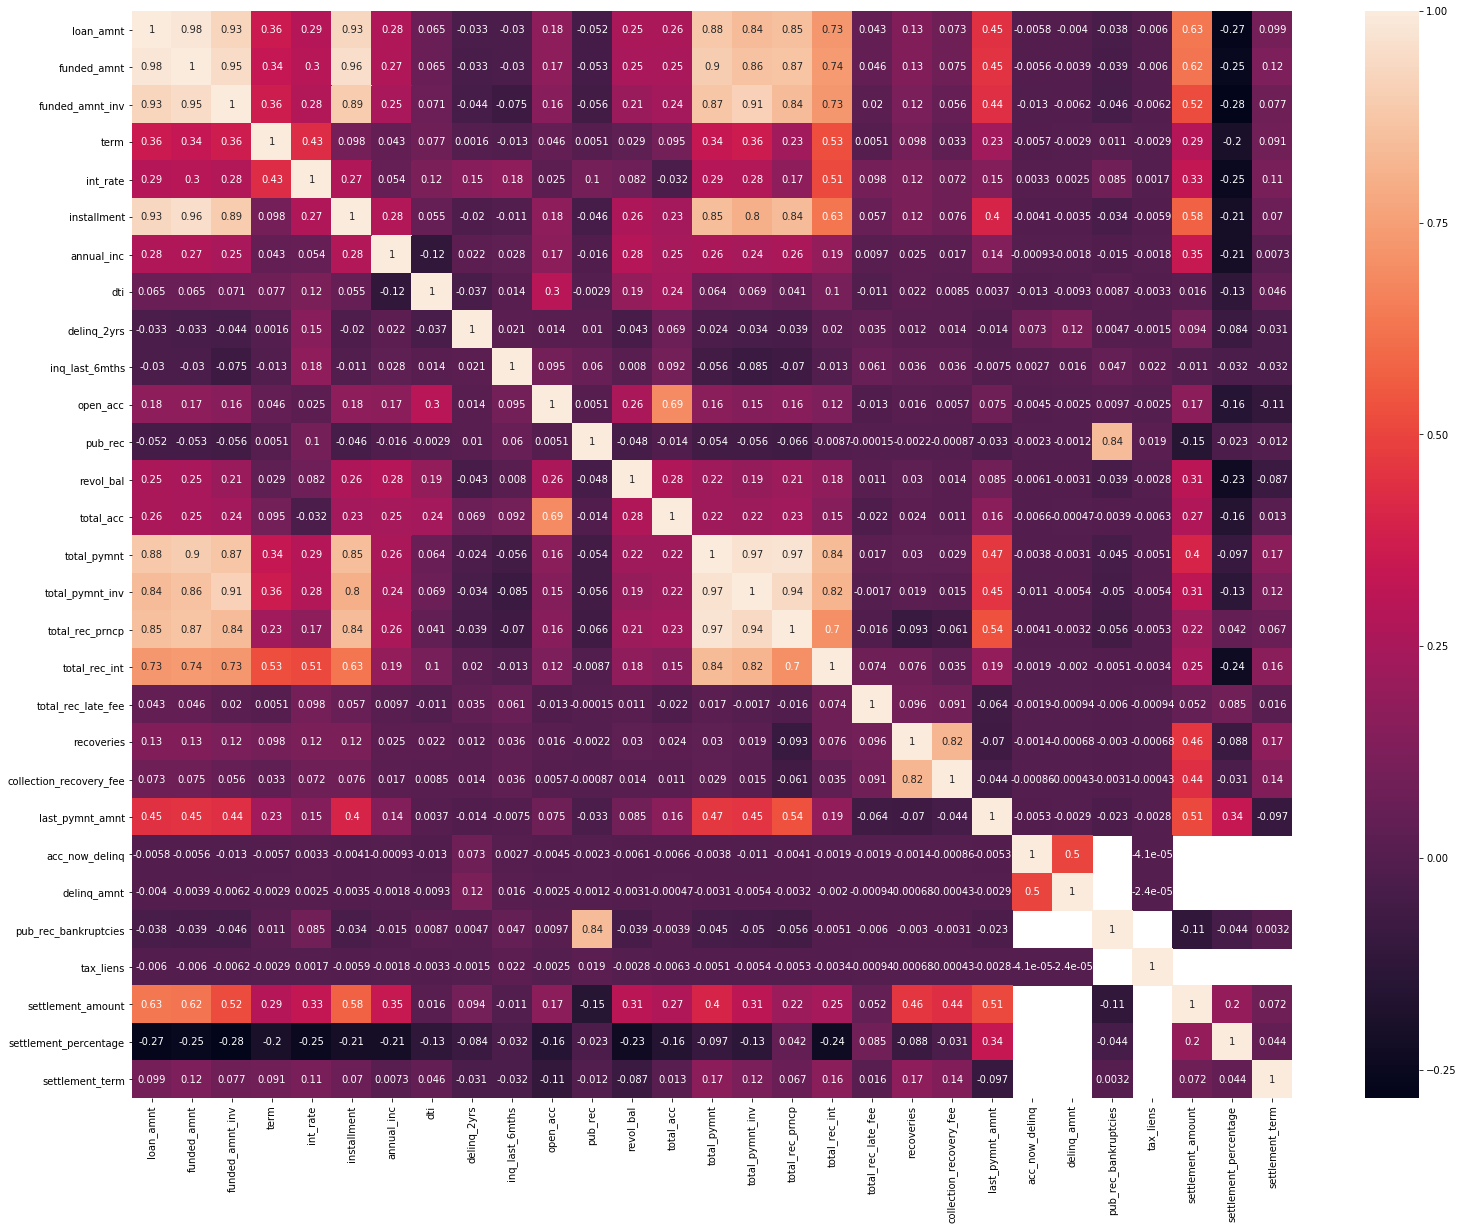

In [6]:
##  From the above observations dropping unwanted columns, like null columns, columns with few non null entries,
##  columns with mean of zero etc

loan.drop(['id','out_prncp','out_prncp_inv','policy_code','collections_12_mths_ex_med','next_pymnt_d',\
           'chargeoff_within_12_mths','mths_since_last_delinq','mths_since_last_record'], axis=1, inplace=True)
plt.figure(figsize=(26,20))
sns.heatmap(loan.corr(), annot=True)

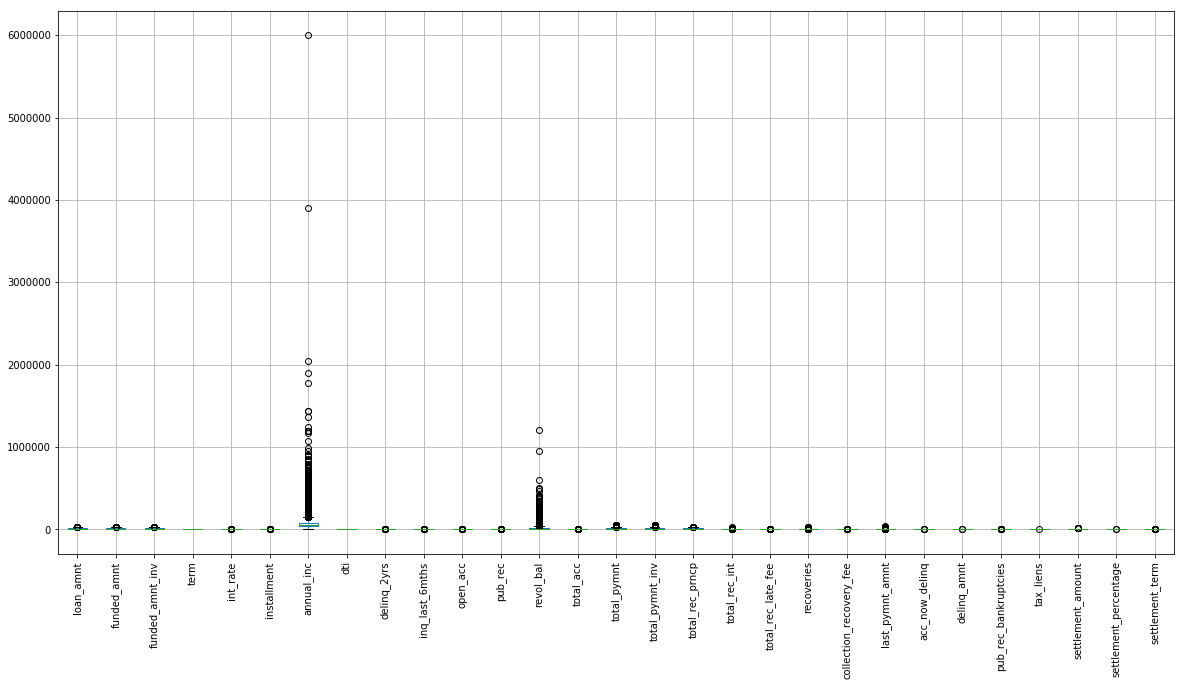

In [7]:
## To find the outliers

plt.figure(figsize=(20,10))
loan.boxplot(rot=90)

#####  From boxplot, columns annual_inc and revol_bal are having many outliers with annual income having huge outliers

In [8]:
print(loan.shape)
loan.head(4)

(42536, 54)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,f,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,May-19,Individual,0.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,f,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,Oct-16,Individual,0.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.50%,10.0,f,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,Jun-17,Individual,0.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598.0,21%,37.0,f,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,Apr-16,Individual,0.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN


Number
 issue_d
2007.0      603
2008.0     2393
2009.0     5281
2010.0    12537
2011.0    21721
Name: loan_amnt, dtype: int64 

Average


issue_d
2007.0     8254.519071
2008.0     8825.428333
2009.0     9833.033516
2010.0    10528.240408
2011.0    12047.503568
Name: loan_amnt, dtype: float64

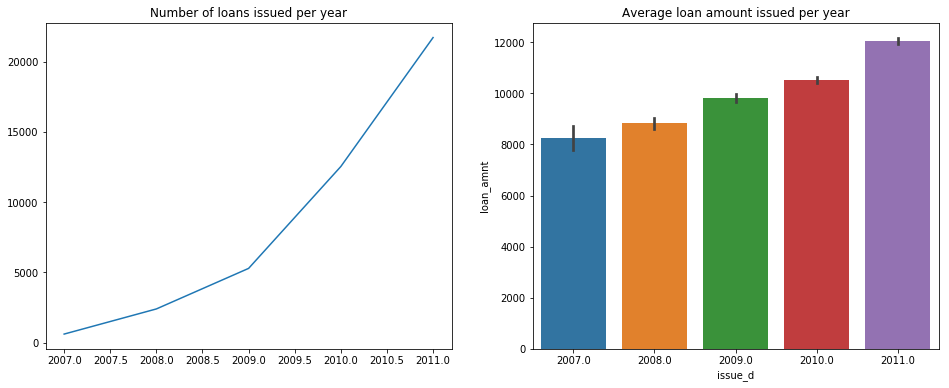

In [9]:
## Finding the number od loans and average amount issued per year

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.plot(loan.groupby(loan.issue_d.dt.year).loan_amnt.count()) 
ax1.set_title('Number of loans issued per year')
sns.barplot(loan.issue_d.dt.year, 'loan_amnt', data=loan)
ax2.set_title('Average loan amount issued per year')
print("Number\n",loan.groupby(loan.issue_d.dt.year).loan_amnt.count(),"\n\nAverage")
loan.groupby(loan.issue_d.dt.year).loan_amnt.mean()

issue_d
1.0     2616
2.0     2588
3.0     3002
4.0     3067
5.0     3167
6.0     3494
7.0     3694
8.0     3729
9.0     3873
10.0    4181
11.0    4439
12.0    4685
Name: term, dtype: int64

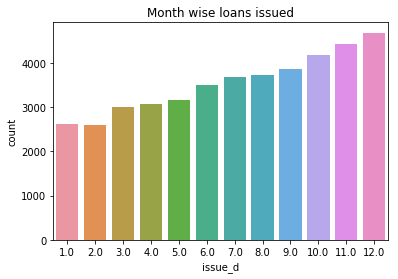

In [10]:
## Loans issued month wise

plt.title('Month wise loans issued')
sns.countplot(x=loan.issue_d.dt.month,  data=loan)
loan.groupby(loan.issue_d.dt.month).term.count()

### Analysis 1
      There is a steady increase in the number of loans issued each year. Almost double than the previous year. 
      Also there is a gradual increase in the mean loan amount issued per year.
      Most number of loans are issued during last months while first months having the least.
      

In [11]:
## Finding number of loans in each term

loan.term.value_counts()

36.0    31534
60.0    11001
Name: term, dtype: int64

term
36.0     9532.990582
60.0    15552.042996
Name: loan_amnt, dtype: float64

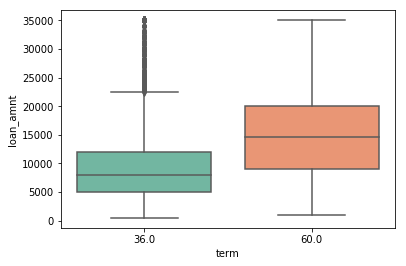

In [12]:
## Term and loan amount

sns.boxplot(x=loan['term'], y=loan['loan_amnt'], palette='Set2')
loan.groupby(loan.term).loan_amnt.mean()

term,36.0,60.0
grade,,
A,9745,438
B,9664,2725
C,6342,2398
D,3849,2167
E,1301,2093
F,413,888
G,220,292


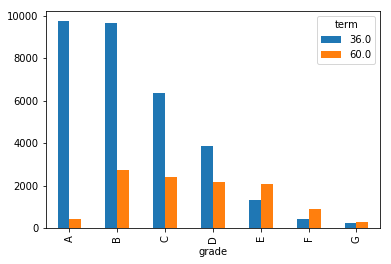

In [13]:
## Term and grade

rel1 = pd.crosstab(loan.grade,loan.term)
rel1.plot.bar()
rel1

Text(0.5, 1.0, 'Term and interest rate on loan amount')

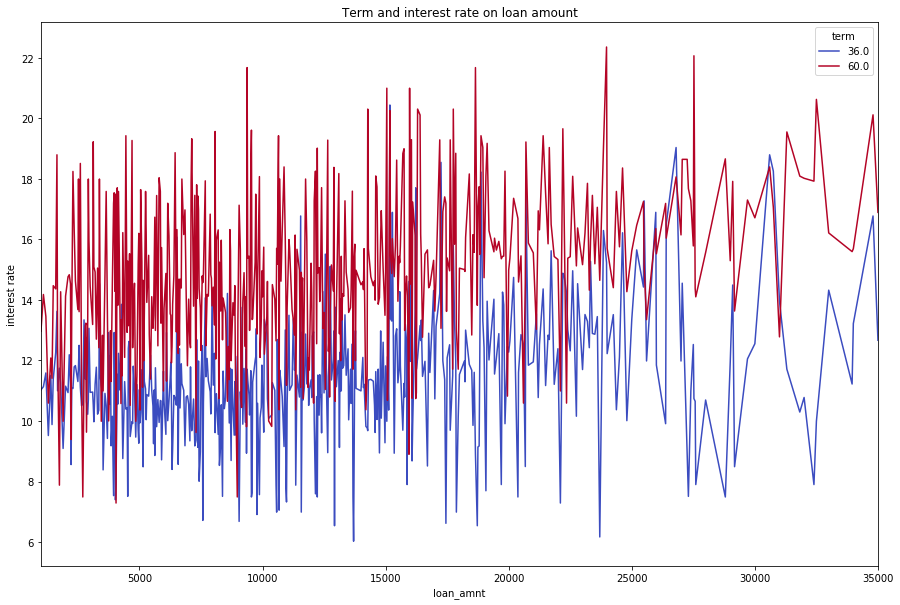

In [14]:
## Term and interest rate

rel2 = pd.pivot_table(loan, index ='loan_amnt', columns='term', values='int_rate')
rel2.dropna(inplace=True)
rel2.plot(kind = 'line', figsize=(15,10), colormap='coolwarm')
plt.ylabel("interest rate")
plt.title('Term and interest rate on loan amount')

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

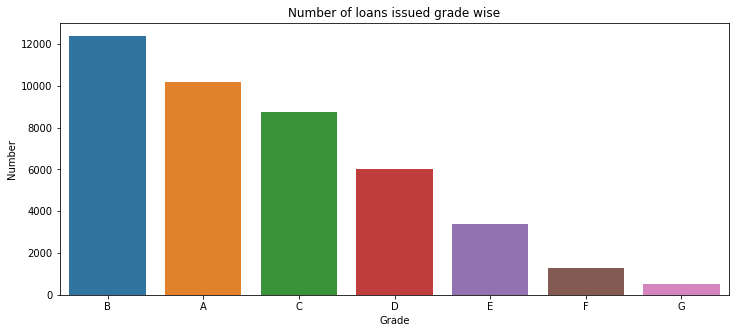

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = 'index', y = 'grade', data = loan.grade.value_counts().reset_index())
plt.ylabel('Number')
plt.xlabel('Grade')
plt.title('Number of loans issued grade wise')
loan.grade.value_counts()

Text(0.5, 1.0, 'Grade and interest rate on loan amount')

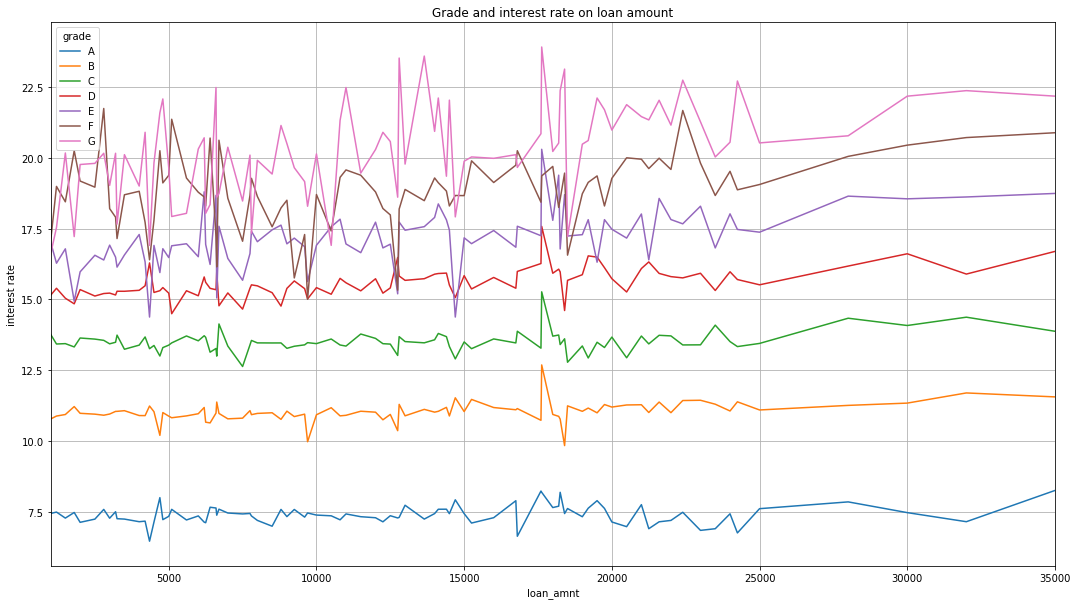

In [39]:
## Checking the relation between grade and interest rate

rel6 = pd.pivot_table(loan, index ='loan_amnt', columns='grade', values='int_rate')
rel6.dropna(inplace=True)
rel6.plot(kind = 'line', figsize=(18,10))
plt.ylabel("interest rate")
plt.grid(True)
plt.title('Grade and interest rate on loan amount')

grade  term
A      36.0     7.335600
       60.0     7.500868
B      36.0    10.987120
       60.0    11.110275
C      36.0    13.405905
       60.0    13.748449
D      36.0    15.197742
       60.0    16.251048
E      36.0    16.388332
       60.0    17.991175
F      36.0    17.723850
       60.0    19.982218
G      36.0    19.028227
       60.0    21.523390
Name: int_rate, dtype: float64

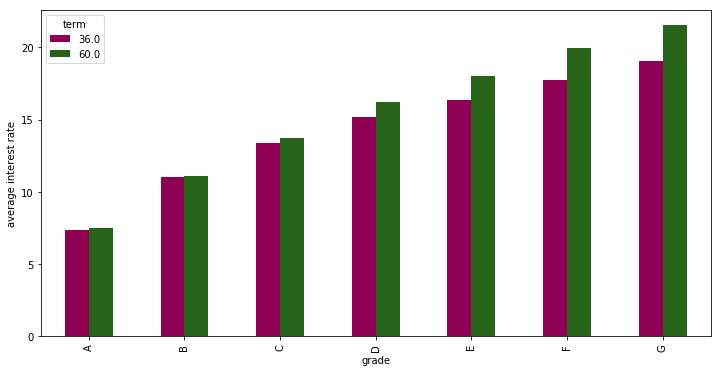

In [17]:
## Analysing the effect of grade and term on interest rates.

rel9 = loan.groupby(['grade','term']).int_rate.mean().reset_index()
rel9.pivot('grade', 'term', 'int_rate').plot(kind = 'bar', colormap = 'PiYG', figsize=(12,6))
plt.ylabel('Average interest rate')
loan.groupby(['grade','term']).int_rate.mean()

### Analysis 2
          Roughly three fourths of all loans are short term ie for 36 months. Also most of the grade A and B loans are
          also short term. Long term loans are given higher loan amounts.
          Loans graded A and B are having the highest numbers. While F and G having the least numbers with higher long
          term loans.
          Long term loans are having higher interest rates than short term loans.
          From the grade and interest rate graph we can conclude that they have a strong positive correlation. ie Higher
          the grades, higher the interest rates and viceversa.
          Finally we can conclude that as the grade and term increases the interest rate also increases. ie G graded 
          long termed loans have the highest interest rates. But loans graded A,B and C appears to have almost same 
          interest rate irrespective of the term period
          

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

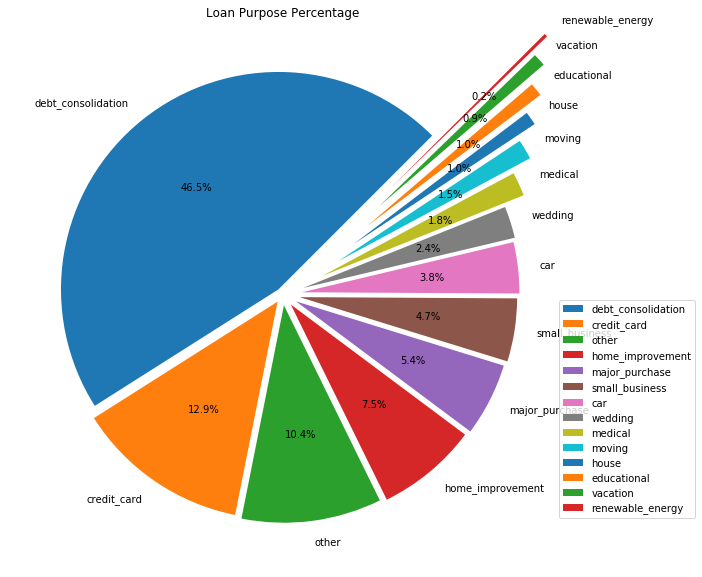

In [18]:
## Percentage of loan purposes

rel3 = loan.purpose.value_counts()
fig,ax = plt.subplots(figsize=(10,10))
explode = (0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7)
ax.pie(rel3, labels = rel3.index, autopct='%1.1f%%', startangle=45, explode=explode)
ax.set_title('Loan Purpose Percentage')
ax.legend(bbox_to_anchor=(1,0.5), labels=rel3.index)
rel3

In [19]:
## Average interest rate based on purpose
loan.groupby(loan.purpose).int_rate.mean().sort_values()

purpose
car                   10.651641
vacation              10.951675
major_purchase        11.013501
renewable_energy      11.527925
home_improvement      11.596121
medical               11.683519
moving                11.752782
credit_card           11.842494
other                 11.985964
wedding               12.033974
educational           12.121540
house                 12.411408
debt_consolidation    12.606085
small_business        13.159493
Name: int_rate, dtype: float64

loan_status,Charged Off,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid
purpose,,,,
car,9.907121,0.804954,3.157895,86.130031
major_purchase,9.606231,0.995240,4.327131,85.071398
wedding,9.561753,1.294821,4.282869,84.860558
credit_card,10.005477,1.259814,4.947964,83.786745
home_improvement,10.972179,2.219444,4.470147,82.338231
vacation,13.250000,1.500000,3.250000,82.000000
debt_consolidation,14.118123,1.476537,4.085761,80.319579
renewable_energy,17.924528,0.943396,1.886792,79.245283
medical,14.077025,2.921647,4.780876,78.220452


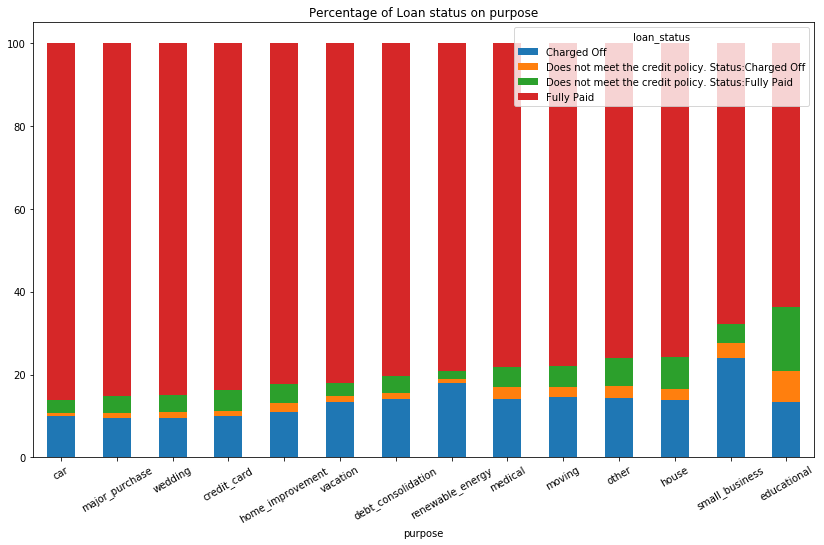

In [40]:
## Finding the status of loans based on their purpose (Calculated in percentage) 

rel4 = pd.crosstab(loan.purpose,loan.loan_status).apply(lambda r: (r/r.sum())*100, axis=1)
rel4 = rel4.sort_values('Fully Paid', ascending=False)
rel4.plot.bar(stacked=True, figsize=(14,8), title='Percentage of Loan status on purpose', rot=30)
rel4

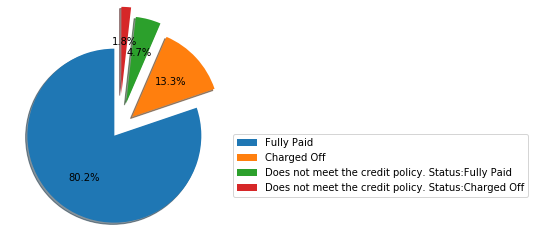

In [21]:
## Find the percentage of loan status

rel5 = loan.loan_status.value_counts()
explode = (0.1,0.2,0.3,0.4)
plt.pie(rel5, startangle=90, autopct='%1.1f%%', explode=explode, shadow=True)
plt.legend(bbox_to_anchor=(1,0.5), labels=rel5.index)

### Analysis 3
        Nearly half of the loans issued is for the purpose of debt consolidation. 
        Small  business loans have the highest average interest rate while car loans have the least.
        More than eighty percentage of the loans have been fully paid. 
        Nearly one fourth of the loans issued for small business has been charged off. Education loans are having the 
        least fully paid status
        

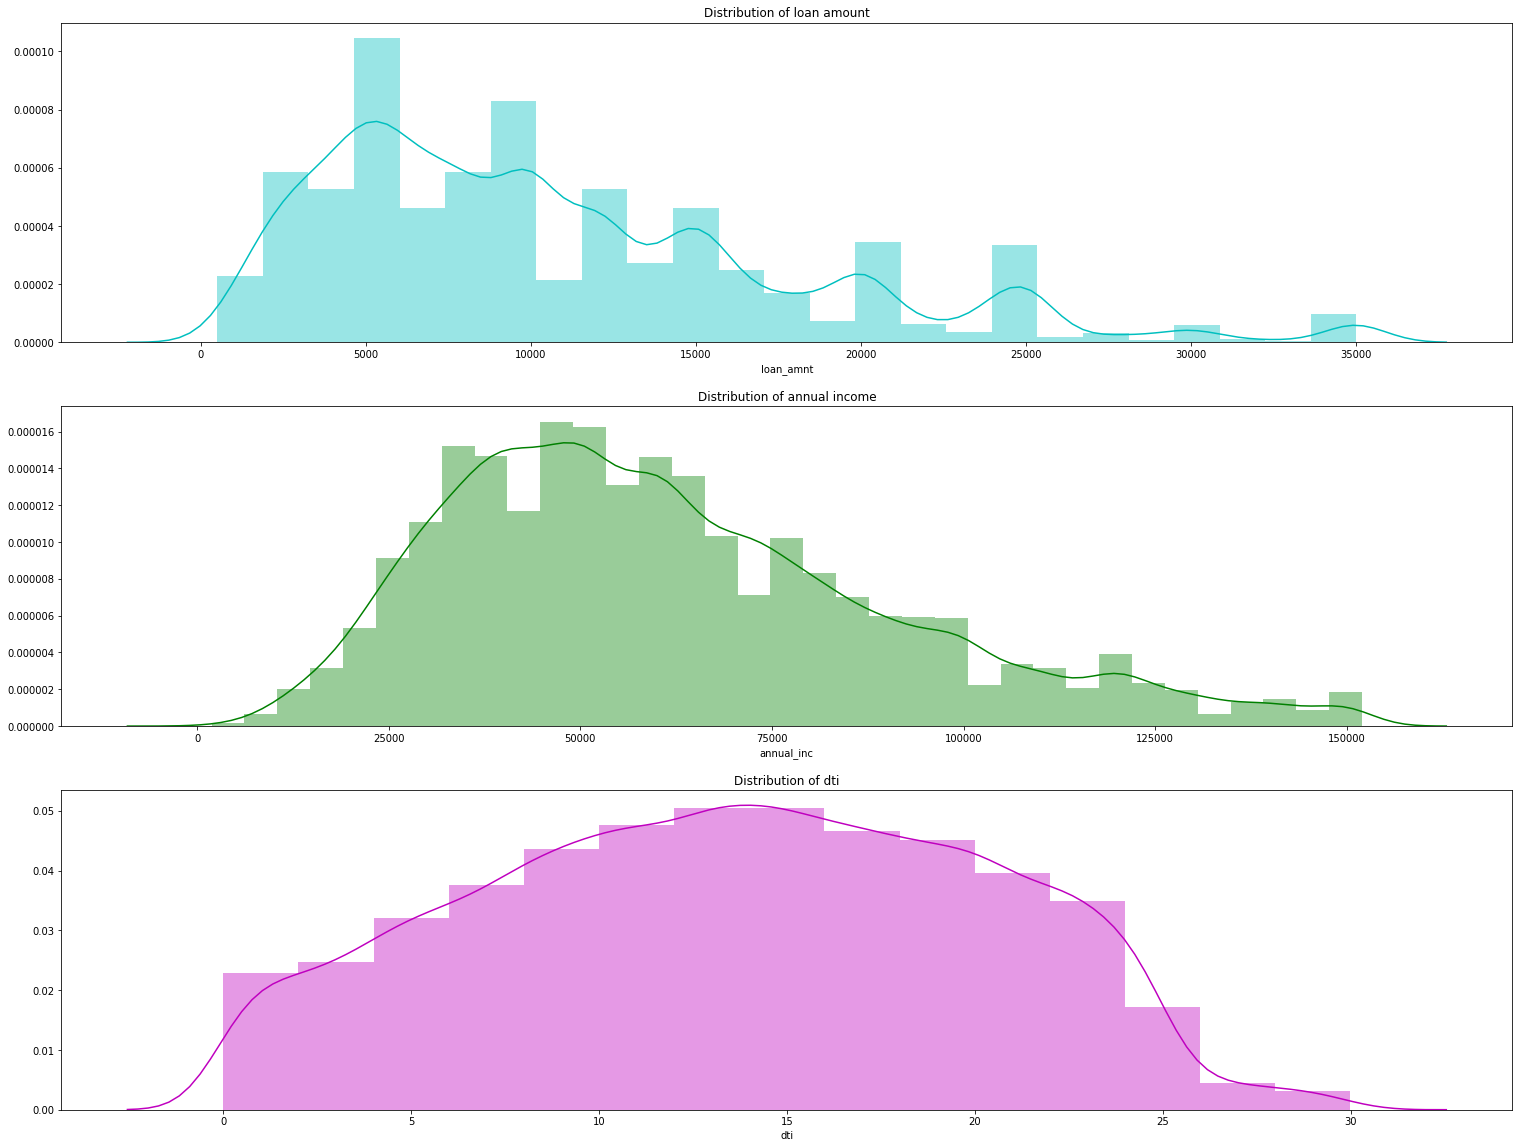

In [22]:
## Viewing the distribution of loan amount, annual income and dti. 
## Outliers in annual income is removed.

rel7 = loan.dropna(subset = ['annual_inc','dti','loan_amnt'])
rel7 = rel7[rel7.annual_inc.between(rel7.annual_inc.quantile(.00), rel7.annual_inc.quantile(.96))]
plt.figure(figsize = (26,20))

plt.subplot(311) 
plt.title('Distribution of loan amount')
sns.distplot(rel7.loan_amnt, bins=25, color='c')
plt.subplot(312) 
plt.title('Distribution of annual income')
sns.distplot(rel7.annual_inc, bins=35, color='g')
plt.subplot(313) 
plt.title('Distribution of dti')
sns.distplot(rel7.dti, bins=15, color='m')

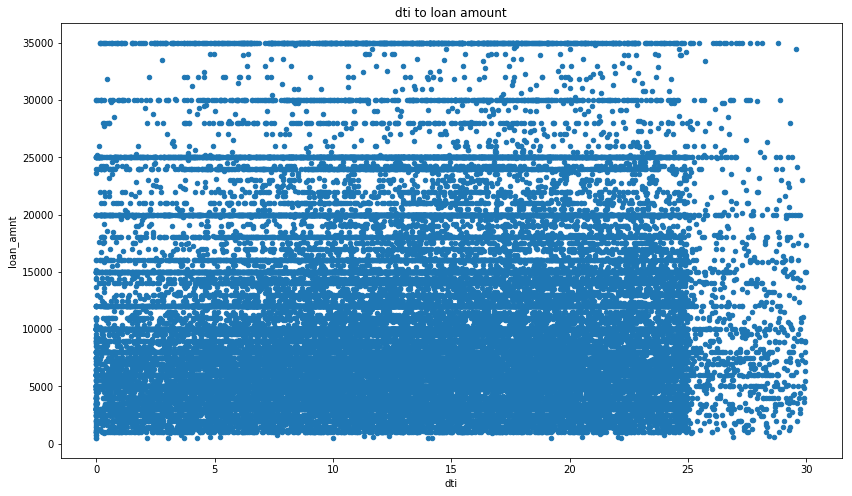

In [23]:
##  debt to dti
loan.plot(kind='scatter', y = 'loan_amnt', x = 'dti', figsize=(14,8), title='dti to loan amount')

### Analysis 4
        From the distribution graphs we can understand that both annual income and loan amount are right skewed. Mean 
        income is close to 50k while mean loan amount is close to 5k.
        The dti graph is not skewed and slightly bell shaped. Eventhough the dti values of zero is higher than thirty.
        From the scatter graph it is evident that most of the loans are below the dti of 25 and amount of 15k. Only
        few loans are having dti above 25 and amount greater than 25k

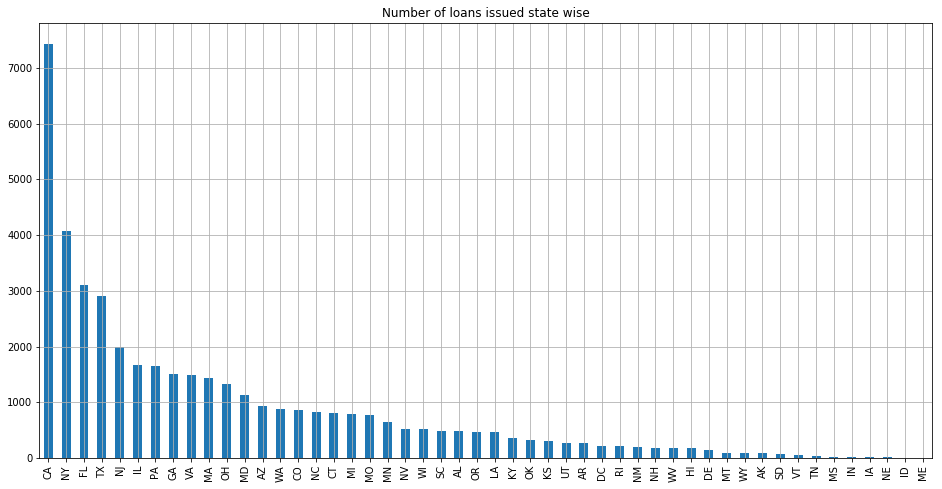

In [24]:
##  State wise loans issued

rel8 = loan.addr_state.value_counts()
plt.figure(figsize = (16,8))
rel8.plot('bar')
plt.title('Number of loans issued state wise')
plt.grid(True)

In [25]:
## Number of each ownership
loan.home_ownership.value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [26]:
## Mean amount issued for each ownership
loan.groupby(loan.home_ownership).funded_amnt.mean().sort_values(ascending=False)

home_ownership
MORTGAGE    12211.698929
OWN          9981.474931
RENT         9662.724840
OTHER        9296.507353
NONE         7125.000000
Name: funded_amnt, dtype: float64

In [27]:
## Mean settlement amount
print(loan.settlement_status.value_counts())
rel12 = loan[loan.settlement_status.isnull()==False]
rel12.groupby(rel12.settlement_status).funded_amnt.mean()

COMPLETE    145
BROKEN       14
ACTIVE        1
Name: settlement_status, dtype: int64


settlement_status
ACTIVE      24000.000000
BROKEN      13185.714286
COMPLETE    15334.137931
Name: funded_amnt, dtype: float64

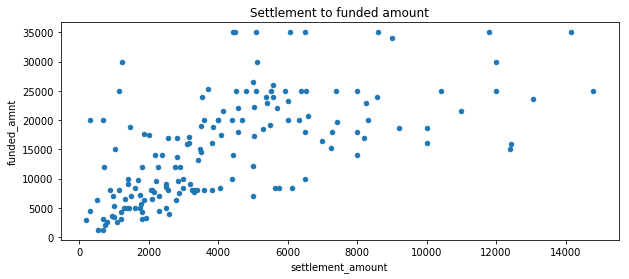

In [28]:
rel12.plot(kind = 'scatter', y = 'funded_amnt', x = 'settlement_amount', figsize=(10,4), title='Settlement to funded amount')

In [29]:
## mean dti to loan status
loan.groupby(loan.loan_status).dti.mean()

loan_status
Charged Off                                            14.005540
Does not meet the credit policy. Status:Charged Off    14.343732
Does not meet the credit policy. Status:Fully Paid     14.107173
Fully Paid                                             13.203492
Name: dti, dtype: float64

In [30]:
## Highest loan amounts to purpose
loan[loan.loan_amnt>30000].purpose.value_counts()

debt_consolidation    476
home_improvement       98
credit_card            87
small_business         85
other                  37
house                  18
major_purchase         16
wedding                 7
medical                 4
moving                  4
car                     1
renewable_energy        1
Name: purpose, dtype: int64

home_ownership  loan_status                                        
MORTGAGE        Charged Off                                             2351
                Does not meet the credit policy. Status:Charged Off      348
                Does not meet the credit policy. Status:Fully Paid       908
                Fully Paid                                             15352
NONE            Does not meet the credit policy. Status:Charged Off        1
                Does not meet the credit policy. Status:Fully Paid         4
                Fully Paid                                                 3
OTHER           Charged Off                                               18
                Does not meet the credit policy. Status:Charged Off       11
                Does not meet the credit policy. Status:Fully Paid        27
                Fully Paid                                                80
OWN             Charged Off                                              446
        

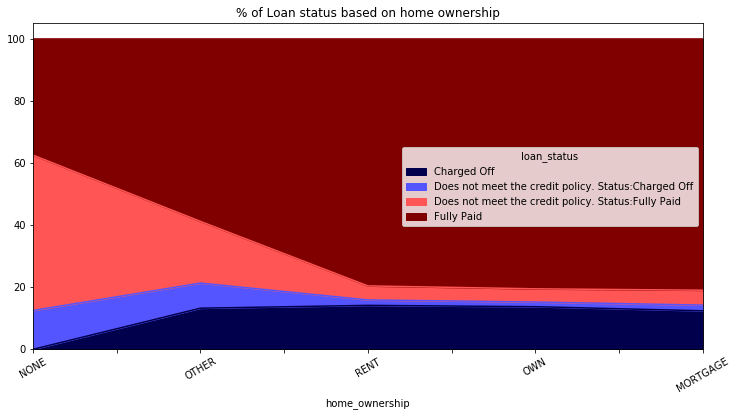

In [31]:
## Loan status to home ownership

rel10 = pd.crosstab(loan.home_ownership,loan.loan_status).apply(lambda r: (r/r.sum())*100, axis=1)
rel10 = rel10.sort_values('Fully Paid')
rel10.plot.area(stacked=True, figsize=(12,6),title='% of Loan status based on home ownership',rot=30,colormap='seismic')
loan.groupby(['home_ownership','loan_status']).term.count()

### Analysis 5
         California(CA) is having the highest number of loans taken followed by New York.
         Most of the loan takers have rent or mortgage ownership. Mortgage is having the highest mean loan amount.
         Settlements are done mostly for amounts lesser than 25k and 10k for loan and settlement respectively. 
         Nearly 60% of high amount loans are taken for debt consolidation followed by home improvement
         From above graph we can conclude that home ownership doesn't have much impact the loan status except for none 
         and other.
         
         

In [32]:
#incOutlRemv=loan[loan.annual_inc<=1000000]
#incOutlRemv.head()

In [33]:
loan.emp_length.value_counts().sort_values(ascending=False)

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [34]:
## mean funded amount to employment length
loan.groupby(loan.emp_length).funded_amnt.mean().sort_values()

emp_length
< 1 year      9259.393520
1 year        9739.728790
2 years       9928.173097
3 years      10349.856783
4 years      10699.534119
5 years      11005.790920
6 years      11053.452632
7 years      11381.586667
8 years      11526.350503
9 years      11699.328859
10+ years    12607.092539
Name: funded_amnt, dtype: float64

Text(0.5, 1.0, 'Loans grades to employment length')

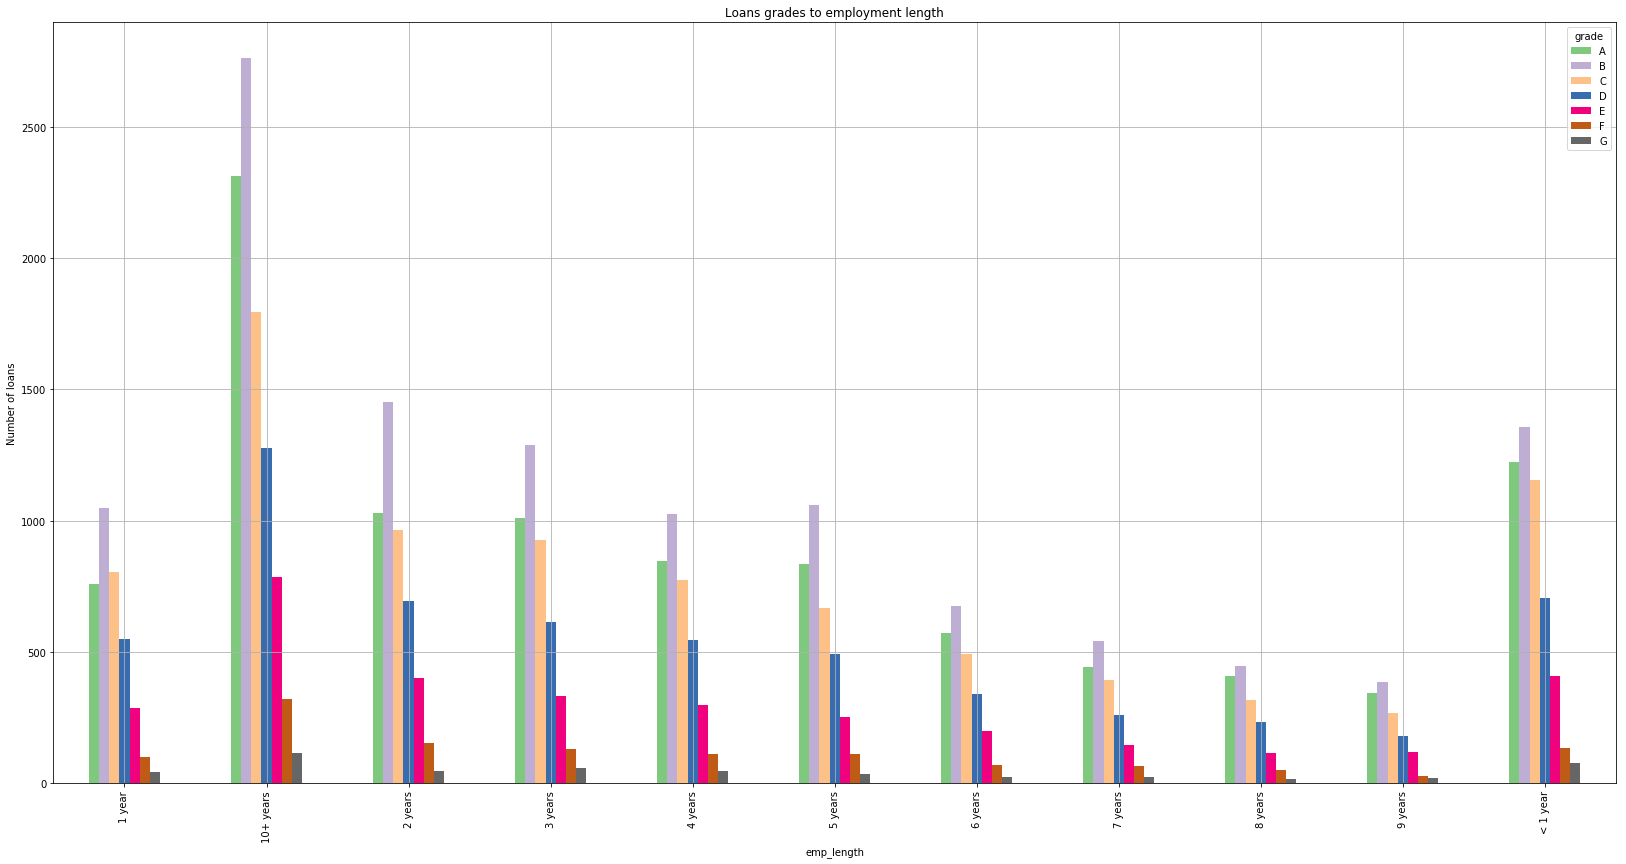

In [42]:
##   Number of loan grades with respect to employment length

rel14 = loan.groupby(['emp_length','grade']).term.count().reset_index()
rel13 = pd.pivot_table(rel14, index ='emp_length', columns='grade', values='term')
rel13.dropna(inplace=True)
rel13.plot(kind = 'bar', figsize=(28,14), colormap='Accent')
plt.ylabel("Number of loans")
plt.grid(True)
plt.title('Loans grades to employment length')

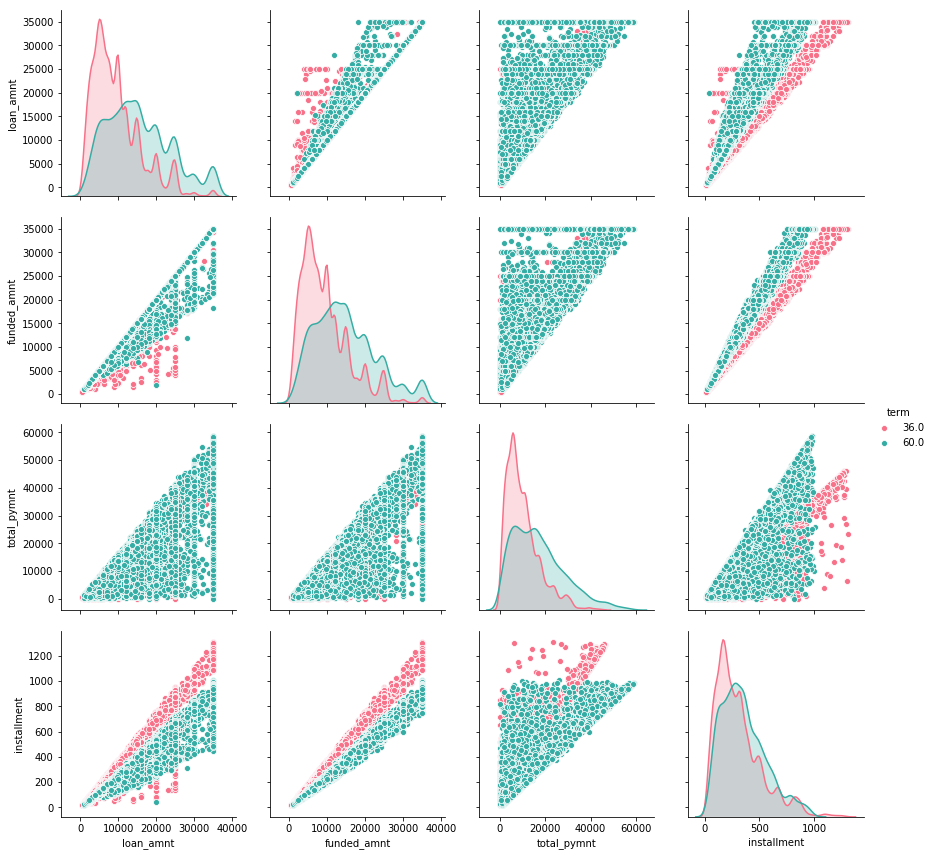

In [36]:
sns.pairplot(loan, vars=["loan_amnt","funded_amnt","total_pymnt","installment"], hue='term', palette='husl', height=3)

### Analysis 6
            Nearly one fourth of the loan takers have an employment length of more than 10 years.
            There is a gradual increase in the average loan amount issued to employment leangth.
            From pairplots,
            Nearly all loan amounts applied for has been fully funded. 
            Installment of short term is higher than that of long term loans.
            